In [1]:
pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-e4fgncyc
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-e4fgncyc
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8311 sha256=6e78100150d736bbcf558d7cb7b712904398e47250bfa216411b2dc53dde0a96
  Stored in directory: /tmp/pip-ephem-wheel-cache-hz5ga59m/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


In [2]:
pip install mtcnn

In [0]:
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np 
from mtcnn.mtcnn import MTCNN 
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from IPython.display import display
import cv2
import os

In [0]:
def extract_face(filename, size = (224, 224)):

  pixels = cv2.imread(filename)
  pixels = cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB)

  detector = MTCNN()
  results = detector.detect_faces(pixels)

  x1, y1, width, height = results[0]['box']
  x2 = x1 + width
  y2 = y1 + height

  face = pixels[y1 : y2, x1 : x2]
  image = Image.fromarray(face)
  image = image.resize(size)

  face_array = np.asarray(image)

  return face_array 

def gen_embeddings(filenames):
	faces = [extract_face(f) for f in filenames]

	samples = np.asarray(faces, 'float32')
	samples = preprocess_input(samples, version = 2)
 
	model = VGGFace(model = 'resnet50', include_top = False, input_shape = (224, 224, 3), pooling = 'avg')
	pred = model.predict(samples)

	return pred

def l2_normalize(x):
  return x / np.sqrt(np.sum(np.multiply(x, x)))	

def identify(database, embedding):
  min_dist = 100

  for name, db_enc in database.items():
    dist = np.linalg.norm(embedding - db_enc)
    if dist < min_dist:
      min_dist = dist
      identity = name

  if min_dist < 0.35:
    print("It is " + str(identity) + ", Welcome.") 
    print("Distance is " + str(min_dist))     		
  else:
    print("No Match")		

In [5]:
database_dir = "images/database"
img_paths = [os.path.join(database_dir, file) for file in sorted(os.listdir(database_dir)) if file.endswith('jpeg')]
img_paths

['images/database/angelina.jpeg',
 'images/database/brad.jpeg',
 'images/database/dwayne.jpeg',
 'images/database/jennifer.jpeg',
 'images/database/leonardo.jpeg',
 'images/database/morgan.jpeg',
 'images/database/tom.jpeg']

In [0]:
embeddings = l2_normalize(gen_embeddings(img_paths))

In [0]:
names = ["Angelina Jolie", "Brad Pitt", "Dwayne Johnson", "Jennifer Lawrence",
        "Leonardo Dicaprio", "Morgan Freeman", "Tom Cruise"]

In [0]:
database = {}

for name, embedding in zip(names, embeddings):
  database[name] = embedding

In [10]:
database.items()

dict_items([('Angelina Jolie', array([0.0000000e+00, 7.7457195e-03, 1.6767492e-03, ..., 3.2555239e-04,
       0.0000000e+00, 8.8890491e-05], dtype=float32)), ('Brad Pitt', array([0.0000000e+00, 0.0000000e+00, 5.9411221e-04, ..., 2.2268447e-03,
       1.3758639e-05, 0.0000000e+00], dtype=float32)), ('Dwayne Johnson', array([0.        , 0.00934554, 0.02495233, ..., 0.00674135, 0.0090323 ,
       0.0001062 ], dtype=float32)), ('Jennifer Lawrence', array([6.8914989e-05, 0.0000000e+00, 1.3602951e-02, ..., 6.1940844e-04,
       3.2115735e-02, 1.3801674e-03], dtype=float32)), ('Leonardo Dicaprio', array([9.6588592e-05, 6.8225476e-05, 8.0406275e-03, ..., 0.0000000e+00,
       1.9818634e-02, 1.5188794e-04], dtype=float32)), ('Morgan Freeman', array([0.00221555, 0.00357185, 0.00269035, ..., 0.00056293, 0.00149177,
       0.0054976 ], dtype=float32)), ('Tom Cruise', array([0.        , 0.00430311, 0.01039952, ..., 0.00395904, 0.        ,
       0.01097766], dtype=float32))])

In [0]:
test_img_base = "images/verify"

test_img_paths = [os.path.join(test_img_base, file) for file in sorted(os.listdir(test_img_base)) if file.endswith('jpeg')]

In [12]:
test_img_paths

['images/verify/angelina1.jpeg',
 'images/verify/brad1.jpeg',
 'images/verify/dwayne1.jpeg',
 'images/verify/jennifer1.jpeg',
 'images/verify/leonardo1.jpeg',
 'images/verify/messi.jpeg',
 'images/verify/morgan1.jpeg',
 'images/verify/tom2.jpeg']

In [0]:
test_embeddings = l2_normalize(gen_embeddings(sorted(test_img_paths)))

In [20]:
test_embeddings[0]

array([0.        , 0.00451327, 0.        , ..., 0.0033882 , 0.00175756,
       0.00112656], dtype=float32)

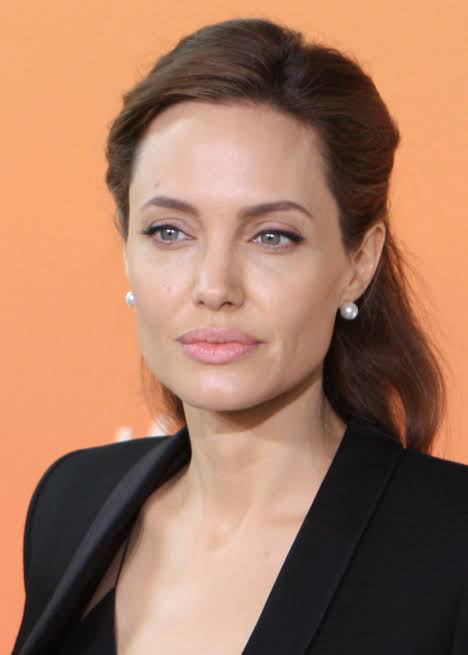

It is Angelina Jolie, Welcome.
Distance is 0.21031533




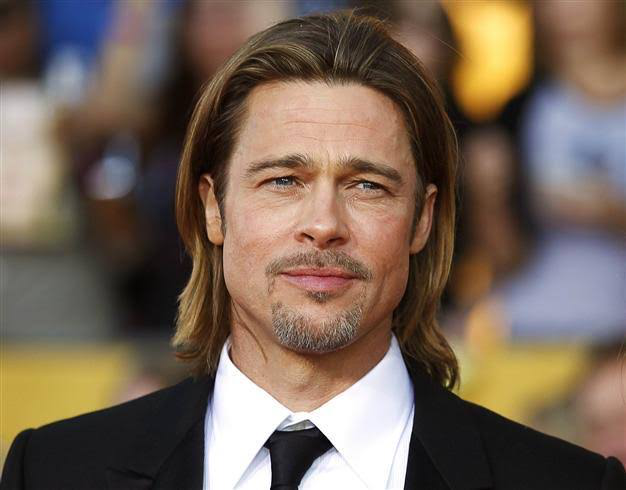

It is Brad Pitt, Welcome.
Distance is 0.22360942




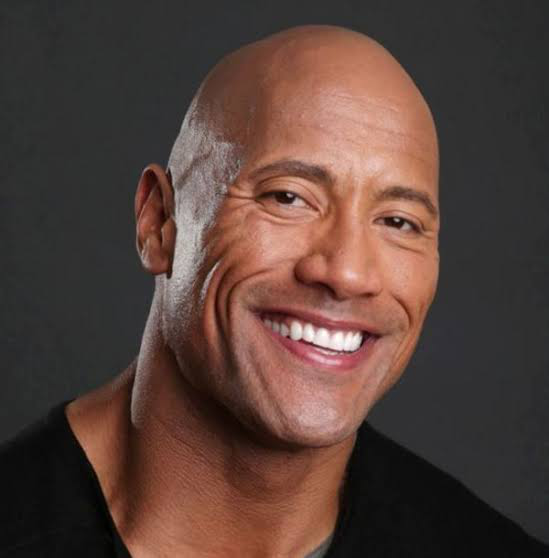

It is Dwayne Johnson, Welcome.
Distance is 0.24786079




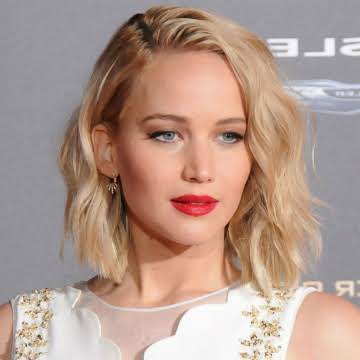

It is Jennifer Lawrence, Welcome.
Distance is 0.2523603




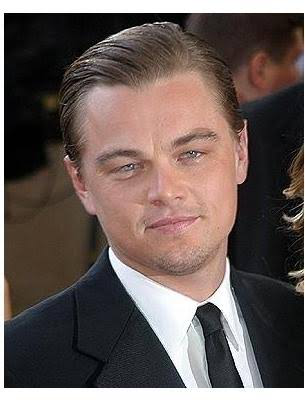

It is Leonardo Dicaprio, Welcome.
Distance is 0.25885528




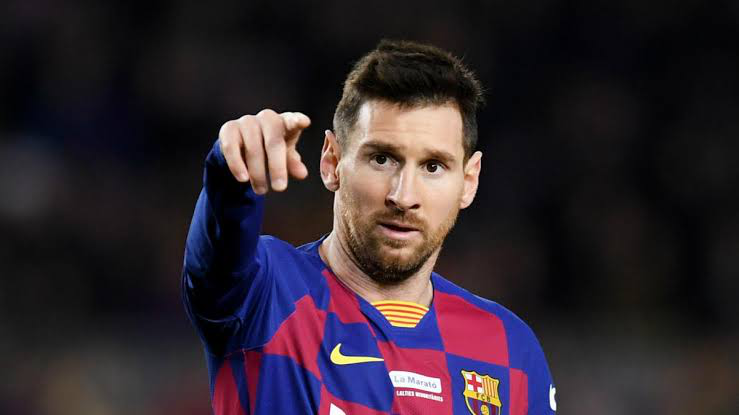

No Match




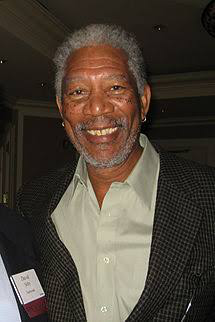

It is Morgan Freeman, Welcome.
Distance is 0.17134443




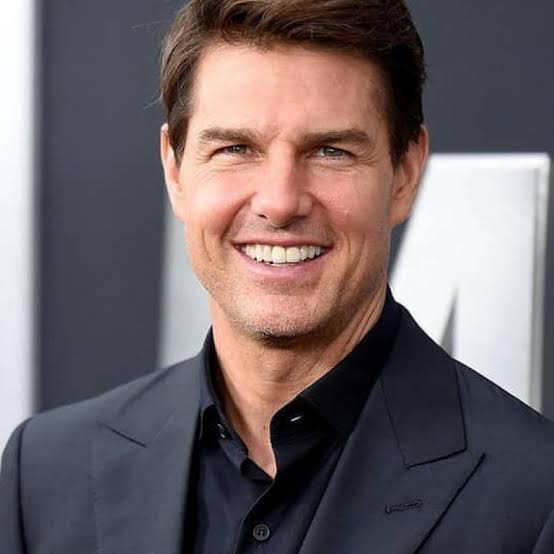

It is Tom Cruise, Welcome.
Distance is 0.27773246




In [22]:
for i in range(len(test_img_paths)):
  img = Image.open(test_img_paths[i])
  display(img)
  identify(database, test_embeddings[i])
  print('\n')